# "DTW for Python" package examples

## Toni Giorgino

The following editable cells reproduce the examples provided in the package's [home page](https://dynamictimewarping.github.io/python/). 

Please refer to the following papers:
 * *General overview of the package, options, and algorithm*: T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package. J. Stat. Soft., 31(7). [doi:10.18637/jss.v031.i07](https://doi.org/10.18637/jss.v031.i07).
 * *Partial matching strategies and normalization*: P. Tormene, T. Giorgino, S. Quaglini, M. Stefanelli (2008). Matching Incomplete Time Series with Dynamic Time Warping: An Algorithm and an Application to Post-Stroke Rehabilitation. Artificial Intelligence in Medicine, 45(1), 11-34. [doi:10.1016/j.artmed.2008.11.007](https://dx.doi.org/10.1016/j.artmed.2008.11.007).



In [2]:
!pip install dtw-python

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



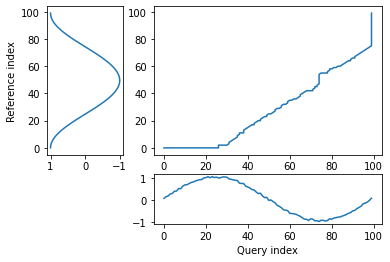

<AxesSubplot:>

In [3]:
import numpy as np

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

In [4]:
print(asymmetricP0)

Step pattern recursion:
 g[i,j] = min(
     g[i  ,j-1] + 0 * d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-1,j  ] +     d[i  ,j  ] ,
 ) 

Normalization hint: N



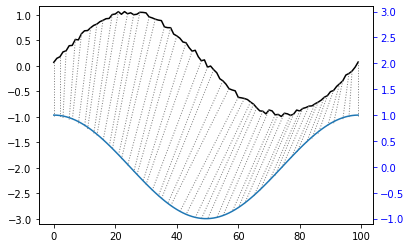

<AxesSubplot:>

In [5]:
## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



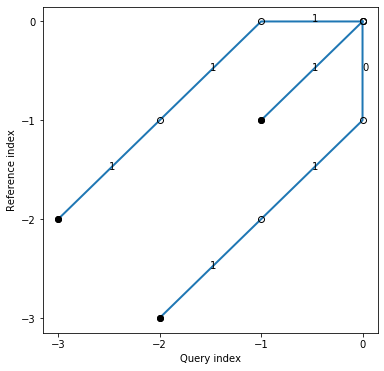

In [ ]:
## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

## And much more!

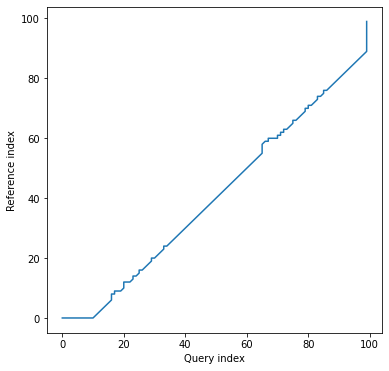

In [ ]:
# Use a windowing restrain
alignment = dtw(query, template, keep_internals=True, 
    window_type="sakoechiba", window_args={'window_size': 10})\
    .plot()

In [ ]:
# Stand-alone (shell) executable
!dtw 

usage: dtw [-h] [--step_pattern STEP_PATTERN] query reference

Command line DTW utility.

positional arguments:
  query                 Query timeseries (tsv)
  reference             Reference timeseries (tsv)

optional arguments:
  -h, --help            show this help message and exit
  --step_pattern STEP_PATTERN
                        Step pattern, aka recursion rule. E.g. symmetric2,
                        asymmetric, ...

The Python and R interfaces provide the full functionality, including plots.
See https://dynamictimewarping.github.io/


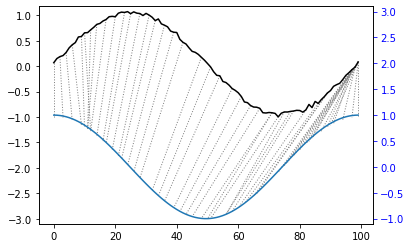

In [ ]:
# OO method call chain
a=dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)


In [ ]:
# Editing the plot and saving to file
a.set_xlabel("test X")
a.figure.savefig("test.png")

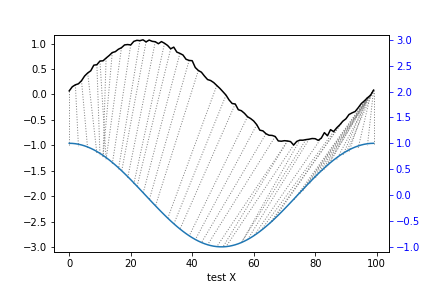

In [ ]:
from IPython.display import Image
Image('test.png')